In [1]:
import pandas as pd
import numpy as np

from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_anth = pd.read_csv("D:/Programming/HC Project/Dataset/Dataset_Compiled - Anthropometric.csv")

In [3]:
data_anth.head()

,Gender,Length/ Height (cm),Weight (kg),Weight-for-height,BMI (Body Mass Index),BMI-for-age z-score,MUAC (Mid Upper Arm Circumference) (cm),Predictions
0,Female,92,11.1,NaN,13.114367,NaN,10.10,1
1,Female,85,8.6,NaN,11.903114,NaN,10.02,1
2,Male,88,12.7,NaN,16.400000,NaN,18.30,0
3,Male,88,17.0,NaN,25.590000,NaN,13.60,0
4,Male,83,9.8,NaN,14.225577,NaN,10.07,1


In [4]:
data_anth.tail()

,Gender,Length/ Height (cm),Weight (kg),Weight-for-height,BMI (Body Mass Index),BMI-for-age z-score,MUAC (Mid Upper Arm Circumference) (cm),Predictions
1010,Female,88,20.3,NaN,26.210000,NaN,17.50,0
1011,Male,89,17.4,NaN,21.970000,NaN,15.50,0
1012,Male,81,9.9,NaN,15.089163,NaN,9.96,1
1013,Male,84,12.5,NaN,17.720000,NaN,18.30,0
1014,Female,84,12.3,NaN,17.430000,NaN,15.70,0


In [5]:
data_anth.columns

Index(['Gender', 'Length/ Height (cm)', 'Weight (kg)', 'Weight-for-height',
       'BMI (Body Mass Index)', 'BMI-for-age z-score',
       'MUAC (Mid Upper Arm Circumference) (cm)', 'Predictions'],
      dtype='object')

In [6]:
data_anth.shape

(1015, 8)

In [7]:
data_anth.describe()

,Length/ Height (cm),Weight (kg),Weight-for-height,BMI (Body Mass Index),BMI-for-age z-score,MUAC (Mid Upper Arm Circumference) (cm),Predictions
count,1015.000000,1015.000000,0.0,1015.000000,0.0,1015.000000,1015.000000
mean,85.901478,13.113103,NaN,17.883021,NaN,13.336384,0.507389
std,3.414516,3.991514,NaN,5.756235,NaN,3.710952,0.500192
min,80.000000,8.000000,NaN,9.569943,NaN,0.000000,0.000000
25%,83.000000,9.650000,NaN,13.053330,NaN,10.030000,0.000000
50%,85.000000,11.700000,NaN,16.190000,NaN,10.900000,1.000000
75%,89.000000,16.400000,NaN,22.410000,NaN,16.750000,1.000000
max,92.000000,21.100000,NaN,31.090000,NaN,19.900000,1.000000


In [8]:
data_anth.isnull().sum()

Gender                                        0
Length/ Height (cm)                           0
Weight (kg)                                   0
Weight-for-height                          1015
BMI (Body Mass Index)                         0
BMI-for-age z-score                        1015
MUAC (Mid Upper Arm Circumference) (cm)       0
Predictions                                   0
dtype: int64

In [9]:
data_anth['Predictions'].unique()

array([1, 0], dtype=int64)

In [10]:
data_anth.dtypes

Gender                                      object
Length/ Height (cm)                          int64
Weight (kg)                                float64
Weight-for-height                          float64
BMI (Body Mass Index)                      float64
BMI-for-age z-score                        float64
MUAC (Mid Upper Arm Circumference) (cm)    float64
Predictions                                  int64
dtype: object

In [11]:
data_anth['Predictions'].value_counts()

1    515
0    500
Name: Predictions, dtype: int64

<AxesSubplot:>

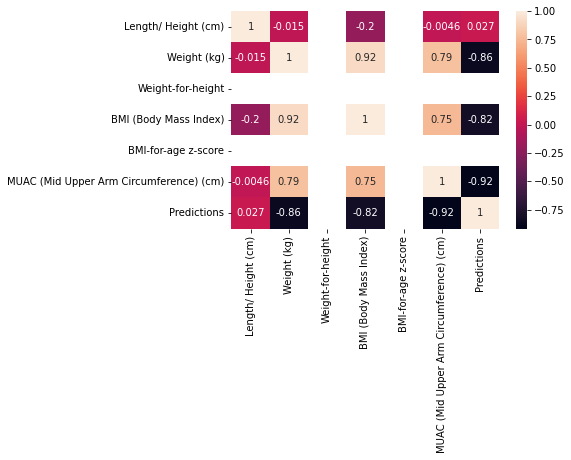

In [12]:
sns.heatmap(data_anth.corr(), annot=True)

## Seperating feature and target label

In [13]:
features = data_anth[['Length/ Height (cm)', 'Weight (kg)', 'BMI (Body Mass Index)', 'MUAC (Mid Upper Arm Circumference) (cm)']]
target = data_anth['Predictions']
predictions = data_anth['Predictions']

In [14]:
acc = []
model = []

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
#Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target, cv=5)

In [19]:
score

array([1., 1., 1., 1., 1.])

### Saving Model DecisionTree

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9950738916256158
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.99      0.99        98

    accuracy                           1.00       203
   macro avg       1.00      0.99      1.00       203
weighted avg       1.00      1.00      1.00       203



In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99507389, 1.        , 0.99507389, 0.99507389, 0.99507389])

### Saving Model Gaussian Naive Bayes

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [23]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)

In [24]:
score

array([1., 1., 1., 1., 1.])

### Saving Model SVM 

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [26]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)

In [27]:
score

array([1., 1., 1., 1., 1.])

### Saving Model LR 

In [ ]:
#run this cell when model is good
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)

In [30]:
score

array([1., 1., 1., 1., 1.])

### Saving Model Random Forest 

In [ ]:
#run this cell when model is good!!
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [31]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[23:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        98

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [33]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)

[23:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [34]:
score

array([1., 1., 1., 1., 1.])

### Saving Model XGBoost 

In [ ]:
#run this cell when all the models are working
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

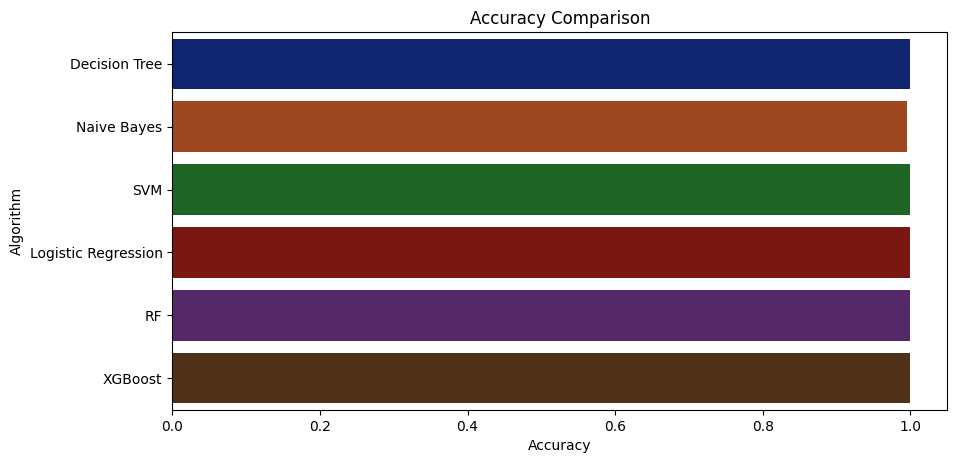

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [36]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 0.9950738916256158
SVM --> 1.0
Logistic Regression --> 1.0
RF --> 1.0
XGBoost --> 1.0


# Making Prediction

In [37]:
data = np.array([[82, 7.9, 11.356, 9.94]])
prediction = XB.predict(data)
print(prediction)

[1]


In [38]:
data = np.array([[82, 13.4, 18.356, 19.04]])
prediction = XB.predict(data)
print(prediction)

[0]
